In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [59]:
df_i=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df_i

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [60]:
df_i.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [61]:
df_i.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


#Exploratory Data analysis

In [62]:
df_i.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

here we can see that there is datatypes as int(17),Object(21) and float(2)

In [63]:
df_i.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [64]:
#checking the uniqus values in the columns
for i in df_ci.columns:
    print(df_ci[i].value_counts())
    print("\n")

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64


policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, L

here we can observe that some of the unique values have ? in the row as it refers to the white spaces and we need to replace it and nan values and replace the Nan values with mean or mode or medien method

In [65]:
df_i.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

here we can null values in authorities contacted and c39 column but there some white spaced lets replace and see

In [66]:
#Replacing the ? with nan values
df_i.replace('?', np.nan, inplace=True)

In [67]:
df_i.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [68]:
col_re=['collision_type','authorities_contacted','property_damage','police_report_available']
for col in col_re:
    mode_value = df_i[col].mode()[0]
    df_i[col].fillna(mode_value, inplace=True)


In [71]:
 df_d=df_i.drop(columns=['policy_number','policy_bind_date','policy_csl','umbrella_limit','insured_zip','incident_state','incident_date','incident_location','_c39'])

In [72]:
df_d.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [73]:
print(df_d.columns)

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')


In [74]:
df_d.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


by observing some columns mean is more than median like column is right skewed and in some columns data is having more gap between 75th percentile and max values means it have outliers

# Data Visualization 

fraud_reported
N    753
Y    247
Name: count, dtype: int64


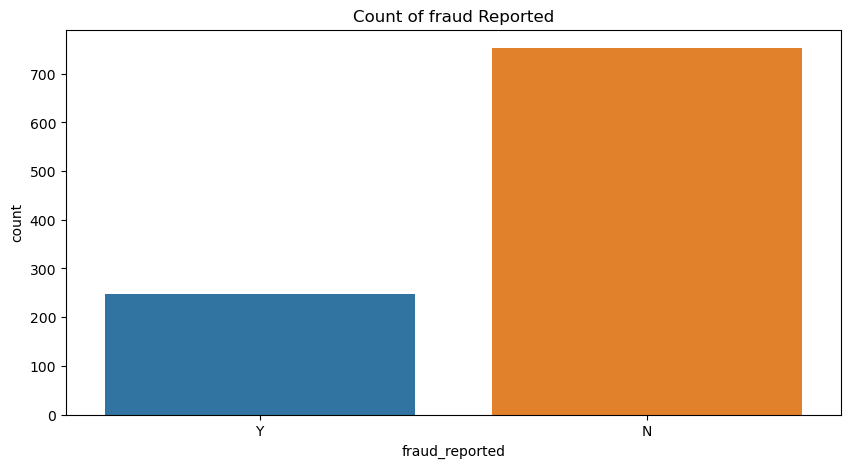

In [75]:
# lets make the countplot for the target variable fraud_reported
print(df_d['fraud_reported'].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x='fraud_reported',data=df_d)
plt.title('Count of fraud Reported')
plt.show()

values in the columns seems imbalance need to do scalar standardization while modelling

In [76]:
#countplots for the categorical data

cat_col = df_d.select_dtypes(include='object').columns.tolist()
cat_col.remove('fraud_reported')
print(cat_col)

['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model']


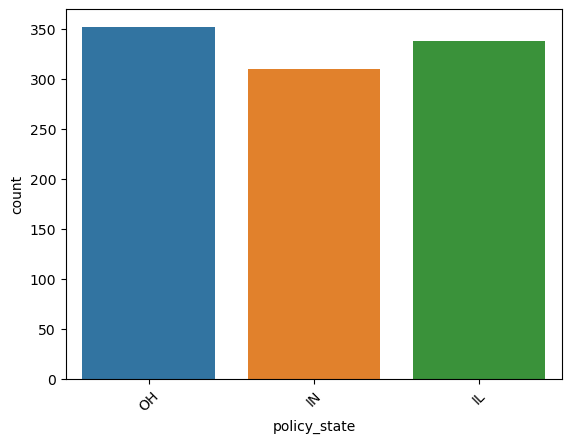

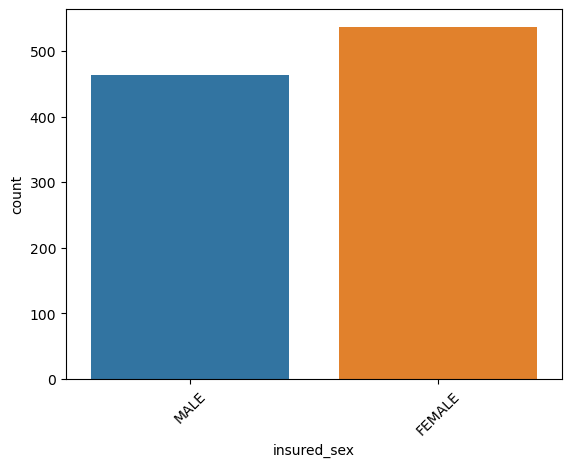

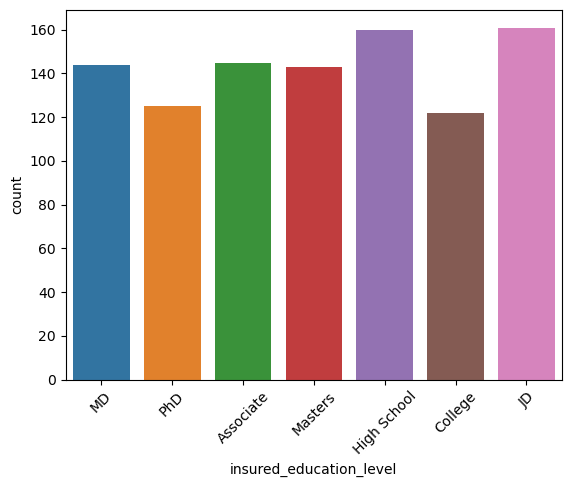

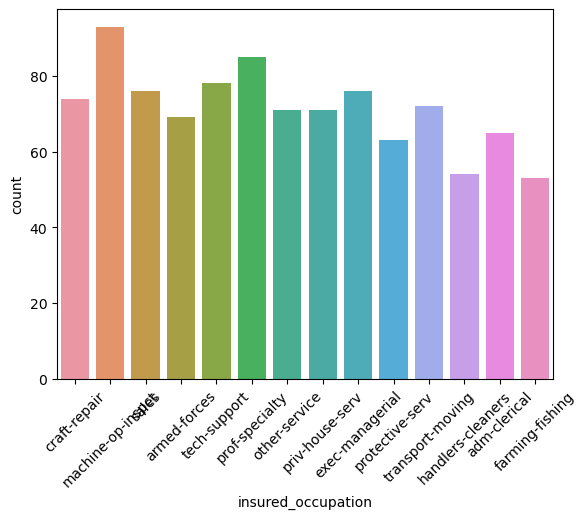

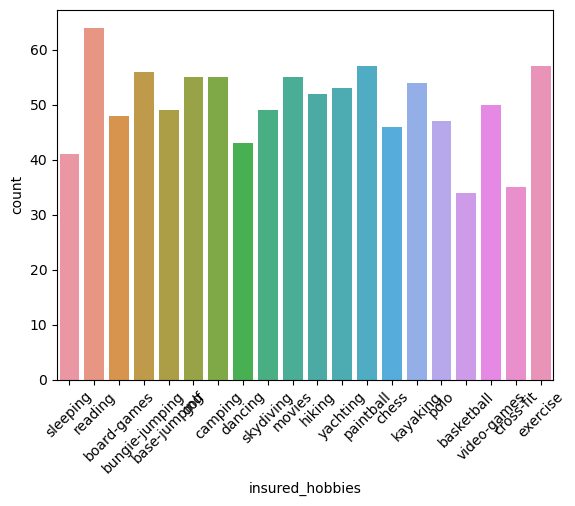

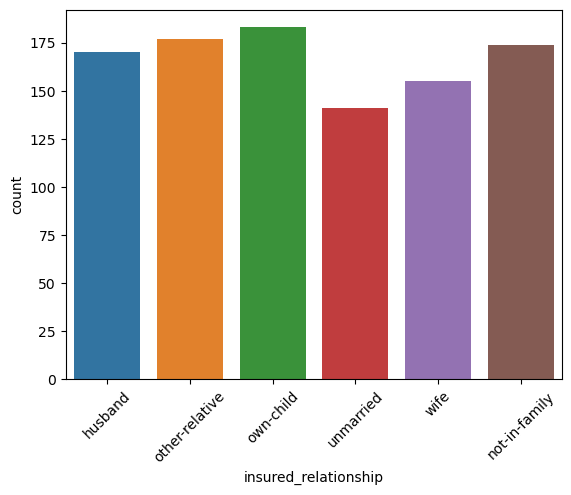

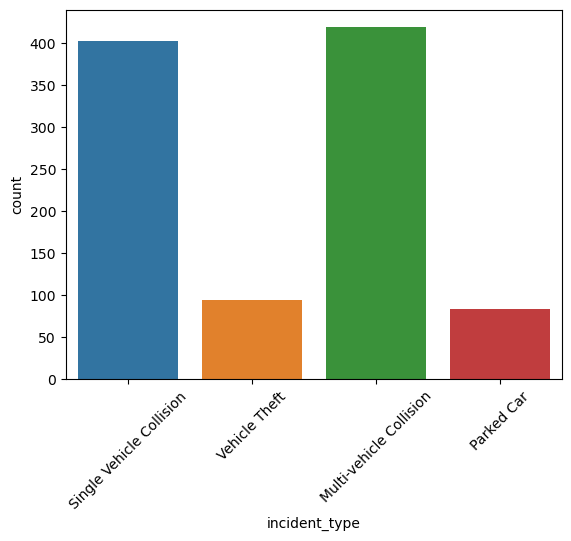

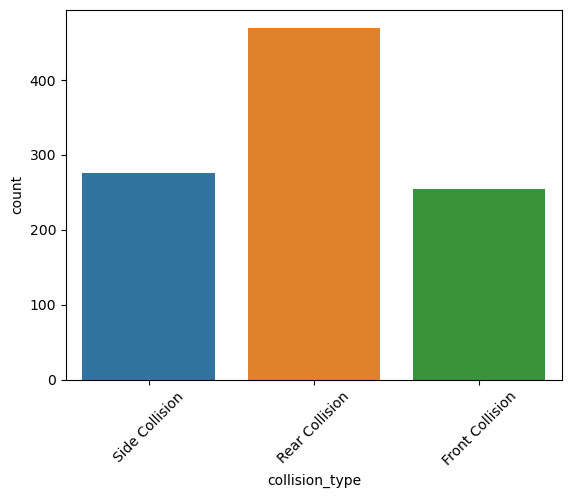

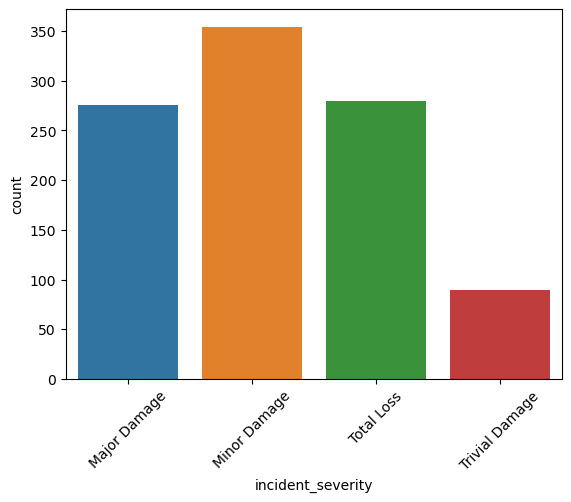

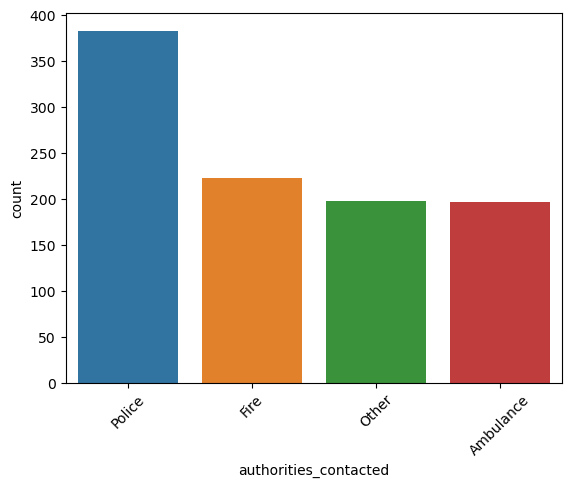

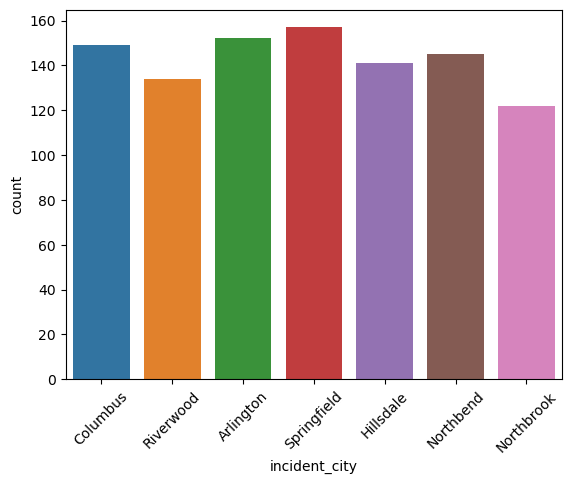

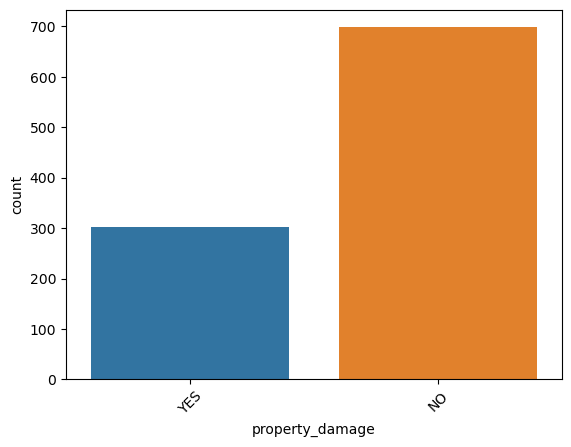

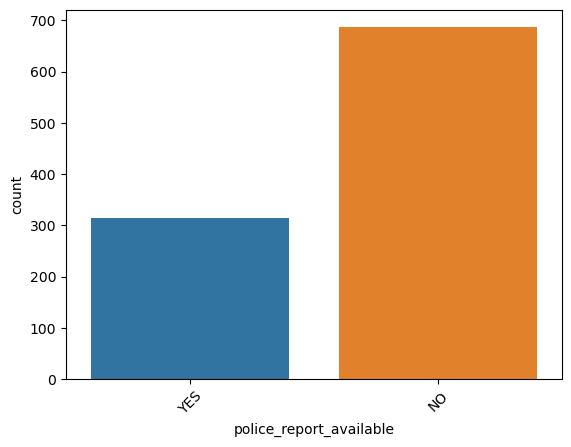

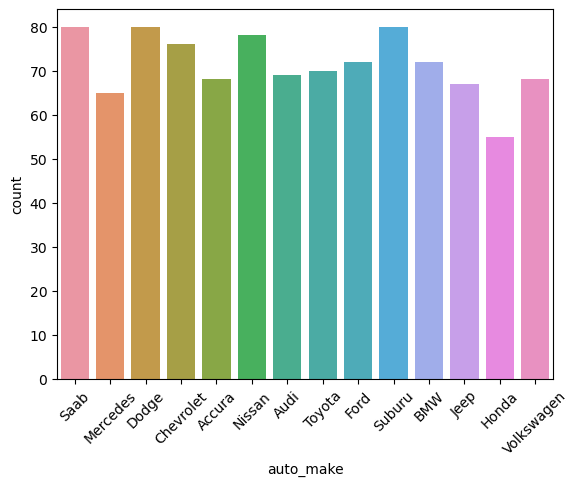

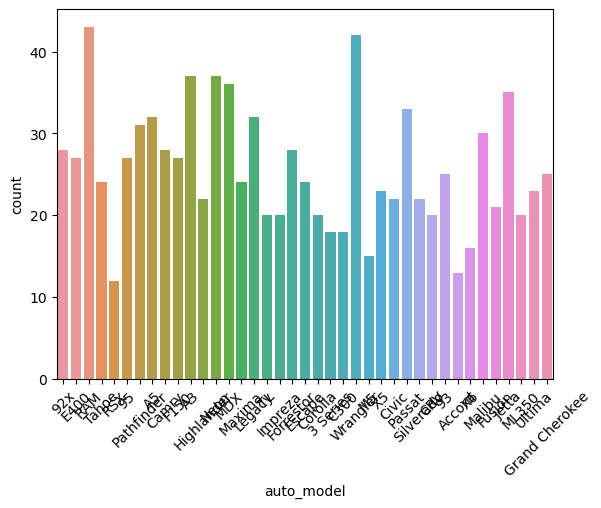

In [78]:
#visualization of the categorical columns

for i in cat_col:
    sns.countplot(x=i,data=df_d)
    plt.xticks(rotation=45)
    plt.show()

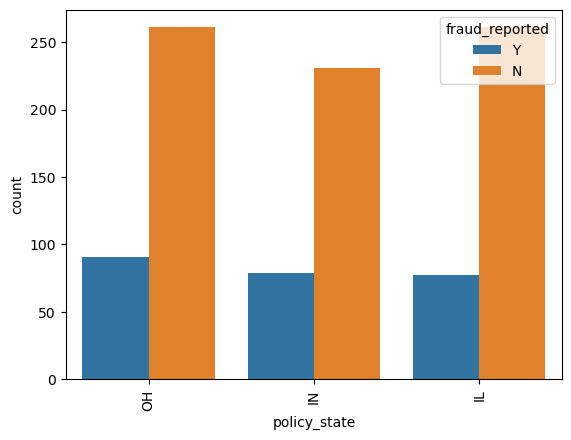

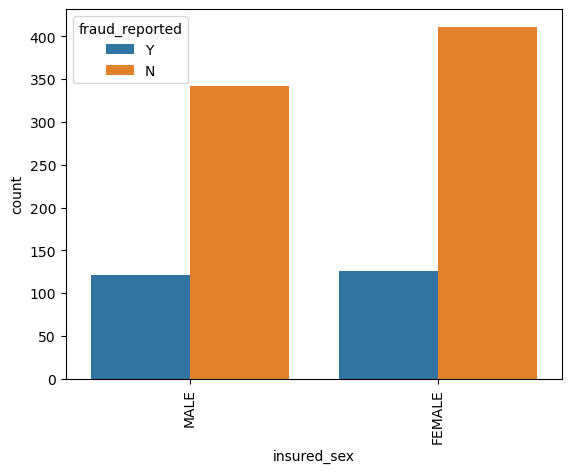

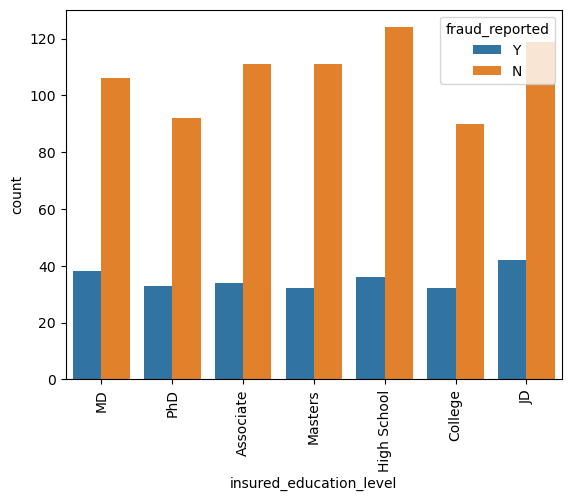

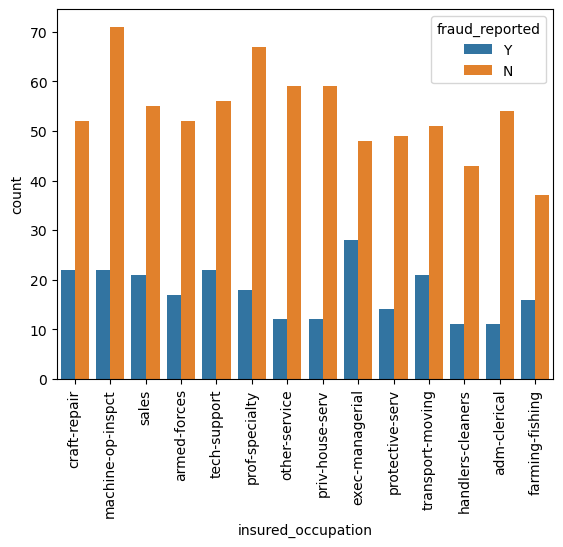

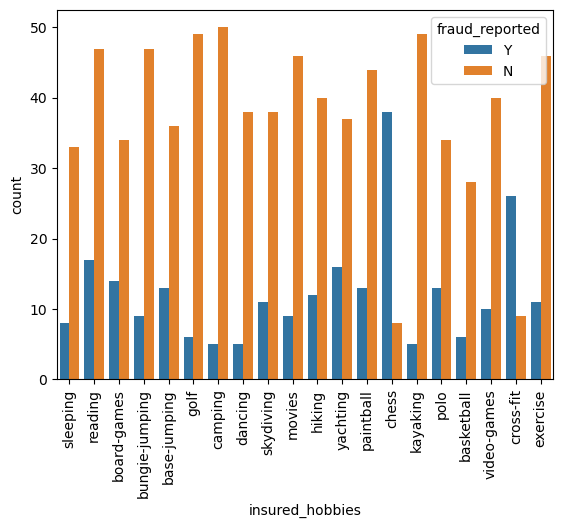

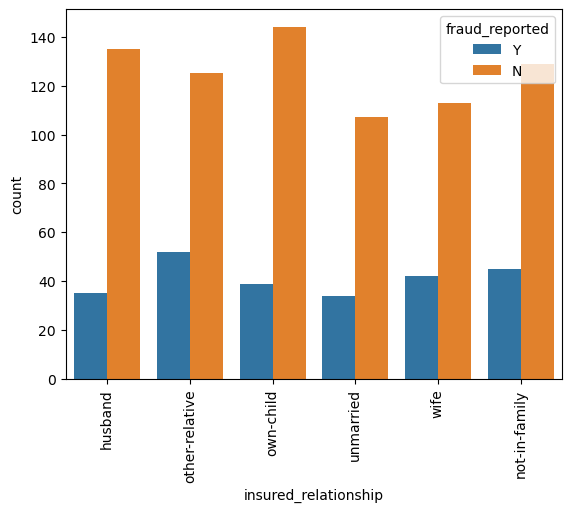

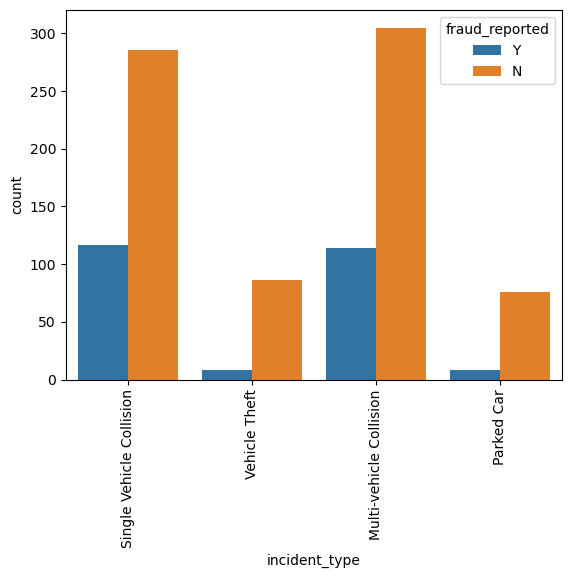

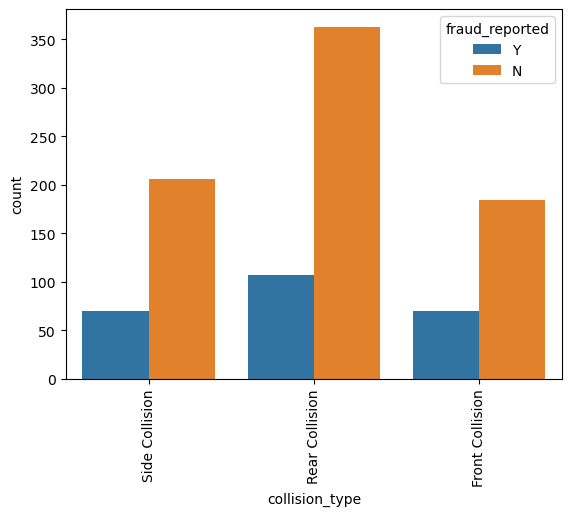

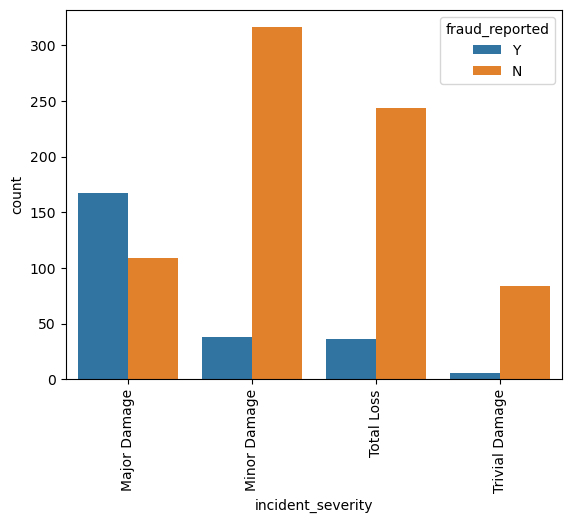

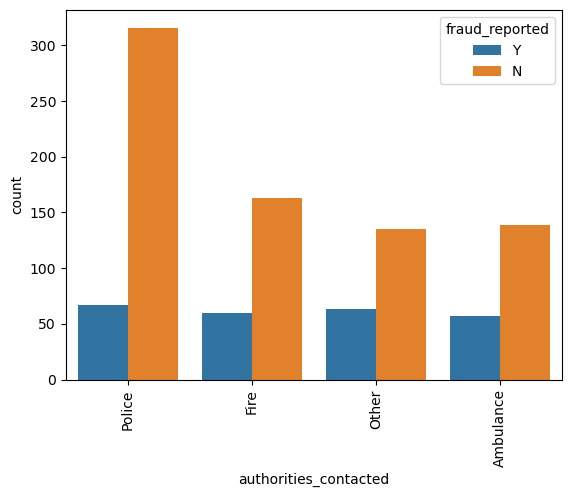

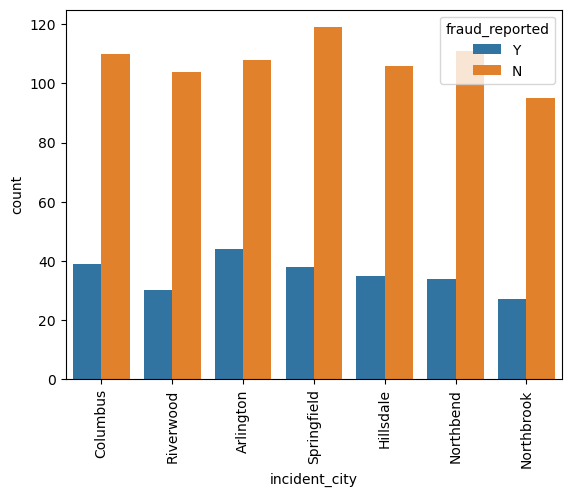

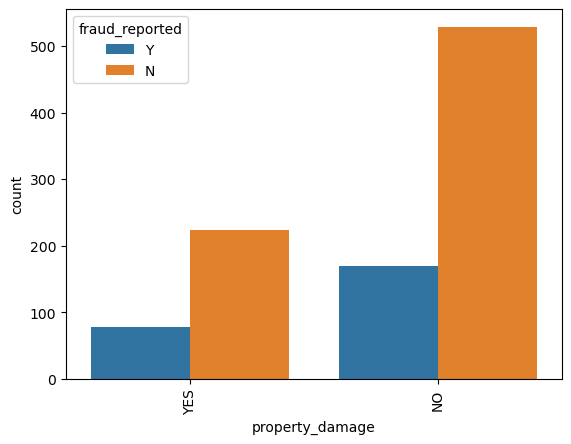

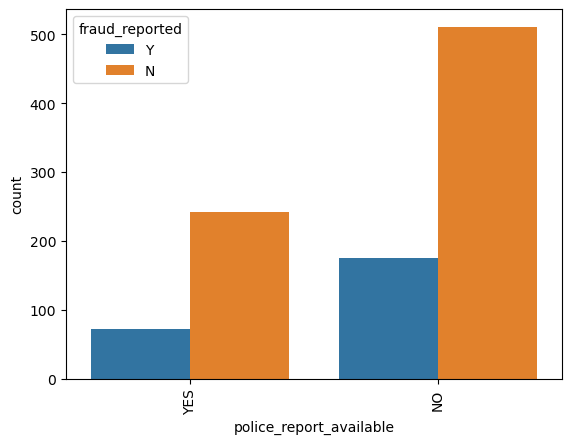

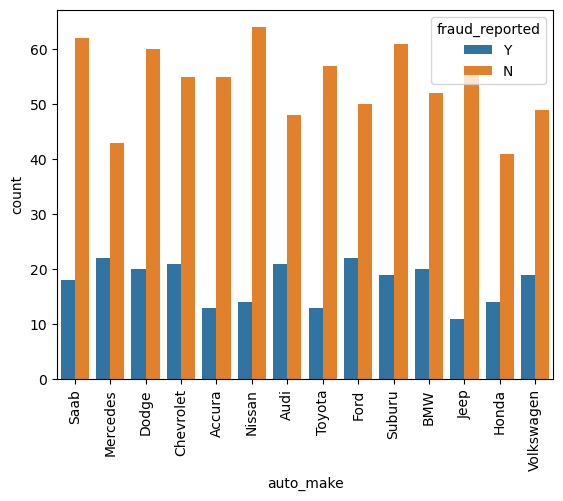

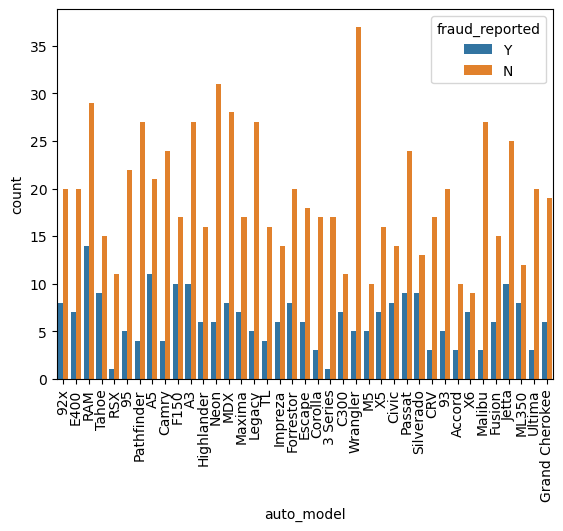

In [79]:
# countplot for categorical columns with fraud report

for i in cat_col:
    sns.countplot(x=i,hue='fraud_reported',data=df_d)
    plt.xticks(rotation=90)
    plt.show()

In [80]:
#making list of numerical columns
num_col = df_d.select_dtypes(exclude='object').columns.tolist()
print(num_col)

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


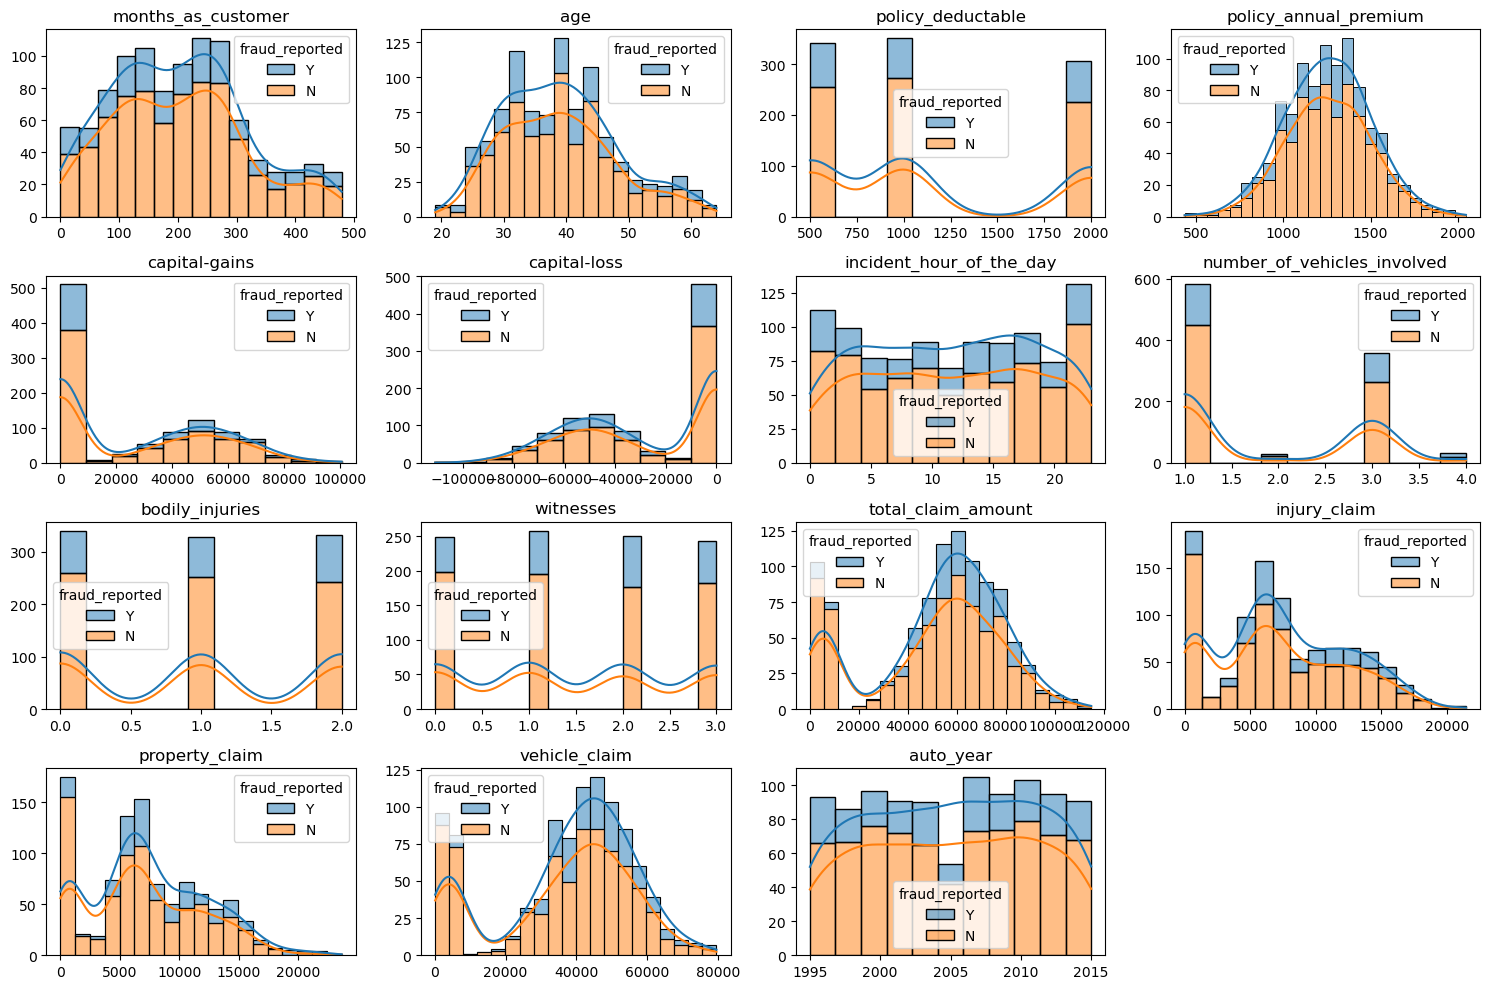

In [81]:
#histogram for the numercal columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_col, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_d, x=col, kde=True, hue='fraud_reported', multiple='stack')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

from the above  graphs we can see that coloumns month as customer, age ,Policy annual premium,incident_hour_of_the_day,total_claim_amout, injury claim ,property_claim,vehicle_claim,auto_year looks almost it is uniformly distributed.

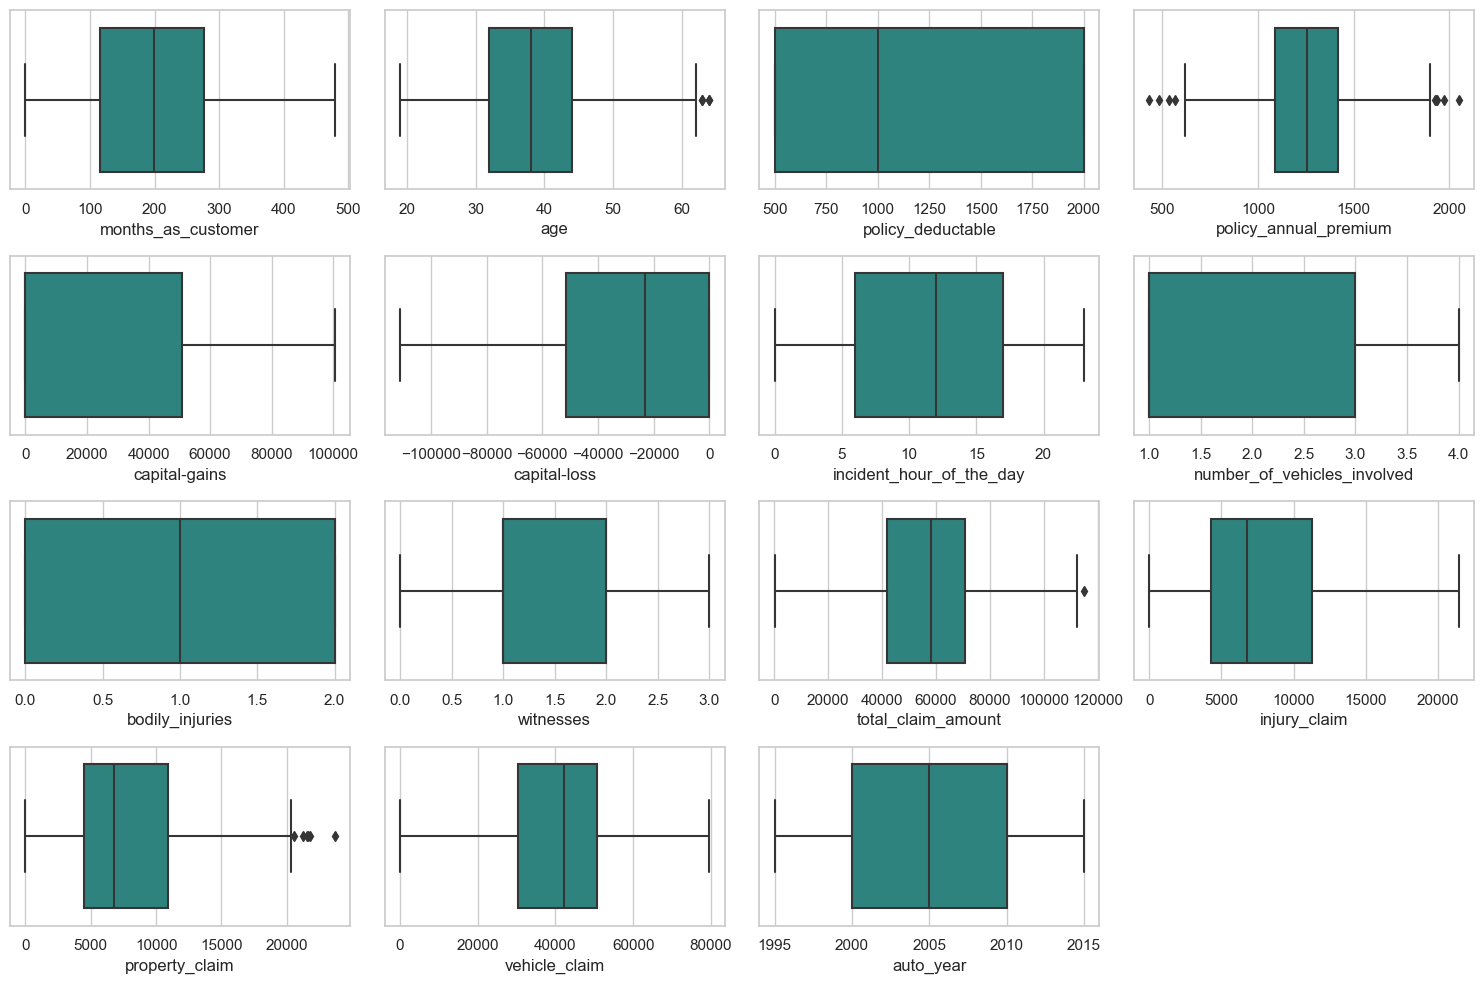

In [84]:
#lets plot the boxplot for checking the outliers
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
for i, col in enumerate(num_col, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df_d[col], palette="viridis")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

We can see the oultliers in the columns of age,Policy_annaul_premium, Total_claim_amout and property_claim

In [85]:
# Calculate skewness for each numerical column
skewness = df_d[num_col].skew()
print(skewness)

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64


skewness of vehicle_claim and total_claim_amount is nearer to the  -0.5 and others  columns are within the range

Removing OUtliers

In [93]:
#lets remove the outliers from the columns by z score method
from scipy import stats
# Calculate the Z-Scores for each numerical attribute
num= df_d.drop('fraud_reported', axis=1).select_dtypes(include=['number']).columns
z_scores=np.abs(stats.zscore(df_d[num]))

# Set a threshold for considering data points as outliers 
threshold=3

# Identify outliers using the threshold
outliers=(z_scores > threshold).any(axis=1)

# Filter the dataset to remove rows with outliers
df_d1=df_d[~outliers]
df_d1


,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,2,YES,3.462913,6510,13020,3.342524,Saab,92x,2004,Y
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,0,NO,2.580284,780,780,2.476983,Mercedes,E400,2007,Y
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,3,NO,3.194563,7700,3850,3.053836,Dodge,RAM,2007,N
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,2,NO,3.416375,6340,6340,3.332711,Chevrolet,Tahoe,2014,Y
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,1,NO,2.652510,1300,650,2.549445,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,FEMALE,Masters,craft-repair,paintball,unmarried,...,1,NO,3.539536,17440,8720,3.402005,Honda,Accord,2006,N
996,285,41,IL,1000,1436.79,FEMALE,PhD,prof-specialty,sleeping,wife,...,3,NO,3.626463,18080,18080,3.466711,Volkswagen,Passat,2015,N
997,130,34,OH,500,1383.49,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,...,3,YES,3.440244,7500,7500,3.345509,Suburu,Impreza,1996,N
998,458,62,IL,2000,1356.92,MALE,Associate,handlers-cleaners,base-jumping,wife,...,1,YES,3.304467,5220,5220,3.213470,Audi,A5,1998,N


In [94]:
#shape of new and old dataframe
print('old Dataframa--',df_d.shape[0])
print('New DataFrame--',df_d1.shape[0])

old Dataframa-- 1000
New DataFrame-- 994


In [95]:
print(((df_d.shape[0]-df_d1.shape[0])/df_d.shape[0])*100)

0.6


The data loss very less and acceptable 

In [96]:
from sklearn.preprocessing import LabelEncoder
for i in df_d1.columns:
        if df_d1[i].dtype == np.number:
            continue
        df_d1[i] = LabelEncoder().fit_transform(df_d1[i])
df_d1

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,2,1,1406.91,1,4,2,17,0,...,2,1,3.462913,257,509,3.342524,10,1,9,1
1,212,23,1,2,1197.22,1,4,6,15,2,...,0,0,2.580284,45,44,2.476983,8,12,12,1
2,123,10,2,2,1413.14,0,6,11,2,3,...,3,0,3.194563,336,103,3.053836,4,30,12,0
3,239,22,0,2,1415.74,0,6,1,2,4,...,2,0,3.416375,244,248,3.332711,3,34,19,1
4,212,25,0,1,1583.91,1,0,11,2,4,...,1,0,2.652510,69,35,2.549445,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,2,1,1310.80,0,5,2,13,4,...,1,0,3.539536,620,377,3.402005,6,6,11,0
996,266,22,0,1,1436.79,0,6,9,17,5,...,3,0,3.626463,626,605,3.466711,13,28,20,0
997,119,15,2,0,1383.49,0,5,1,3,2,...,3,1,3.440244,323,328,3.345509,11,19,1,0
998,377,43,0,2,1356.92,1,0,5,0,5,...,1,1,3.304467,167,169,3.213470,1,5,3,0


In [98]:
#checking the correlation betweeen features and the target
cor=df_d1.corr()
cor

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.911231,-0.000325,0.014843,0.002571,0.056131,0.000810,0.007238,-0.094833,0.068520,...,0.063407,-0.017479,0.050276,0.064349,0.032056,0.050053,0.044589,-0.001932,0.002972,0.016883
age,0.911231,1.000000,-0.015202,0.019363,0.006655,0.072169,0.001895,0.015163,-0.080502,0.075480,...,0.057242,-0.019099,0.058768,0.074601,0.061113,0.054893,0.030967,0.015085,0.002695,0.011913
policy_state,-0.000325,-0.015202,1.000000,0.009818,0.014506,-0.019345,-0.032546,-0.031015,-0.040226,-0.018868,...,0.024869,0.065962,-0.005200,-0.042912,0.005617,-0.001355,0.015828,-0.024610,0.002287,0.028853
policy_deductable,0.014843,0.019363,0.009818,1.000000,-0.005930,-0.011861,0.010082,-0.059761,-0.004282,-0.024153,...,0.075245,0.045756,0.015059,0.030900,0.063615,0.007678,-0.025622,-0.000626,0.029504,0.010608
policy_annual_premium,0.002571,0.006655,0.014506,-0.005930,1.000000,0.043115,-0.021996,0.029452,-0.014415,0.006920,...,0.005419,0.030539,0.010863,-0.023731,-0.001611,0.014709,0.013440,-0.033267,-0.039404,-0.009427
insured_sex,0.056131,0.072169,-0.019345,-0.011861,0.043115,1.000000,0.007995,-0.007253,-0.019860,0.004206,...,0.045979,0.008632,-0.011041,0.005242,-0.005134,-0.015764,0.023531,-0.020309,-0.030766,0.031138
insured_education_level,0.000810,0.001895,-0.032546,0.010082,-0.021996,0.007995,1.000000,-0.022257,0.022702,-0.021183,...,0.017323,0.054786,0.071075,0.081853,0.060799,0.068025,0.058408,0.051743,0.045477,0.011842
insured_occupation,0.007238,0.015163,-0.031015,-0.059761,0.029452,-0.007253,-0.022257,1.000000,-0.009730,-0.007821,...,-0.013169,-0.020298,0.010111,0.028415,0.005319,0.005827,0.047457,0.023939,-0.002745,0.004585
insured_hobbies,-0.094833,-0.080502,-0.040226,-0.004282,-0.014415,-0.019860,0.022702,-0.009730,1.000000,-0.097285,...,-0.033793,-0.030341,-0.020272,0.030080,-0.000321,-0.026378,-0.000411,0.030916,-0.016328,-0.048153
insured_relationship,0.068520,0.075480,-0.018868,-0.024153,0.006920,0.004206,-0.021183,-0.007821,-0.097285,1.000000,...,0.001773,-0.019748,-0.013889,0.017680,0.010809,-0.018935,-0.029894,0.062596,-0.025003,0.018071


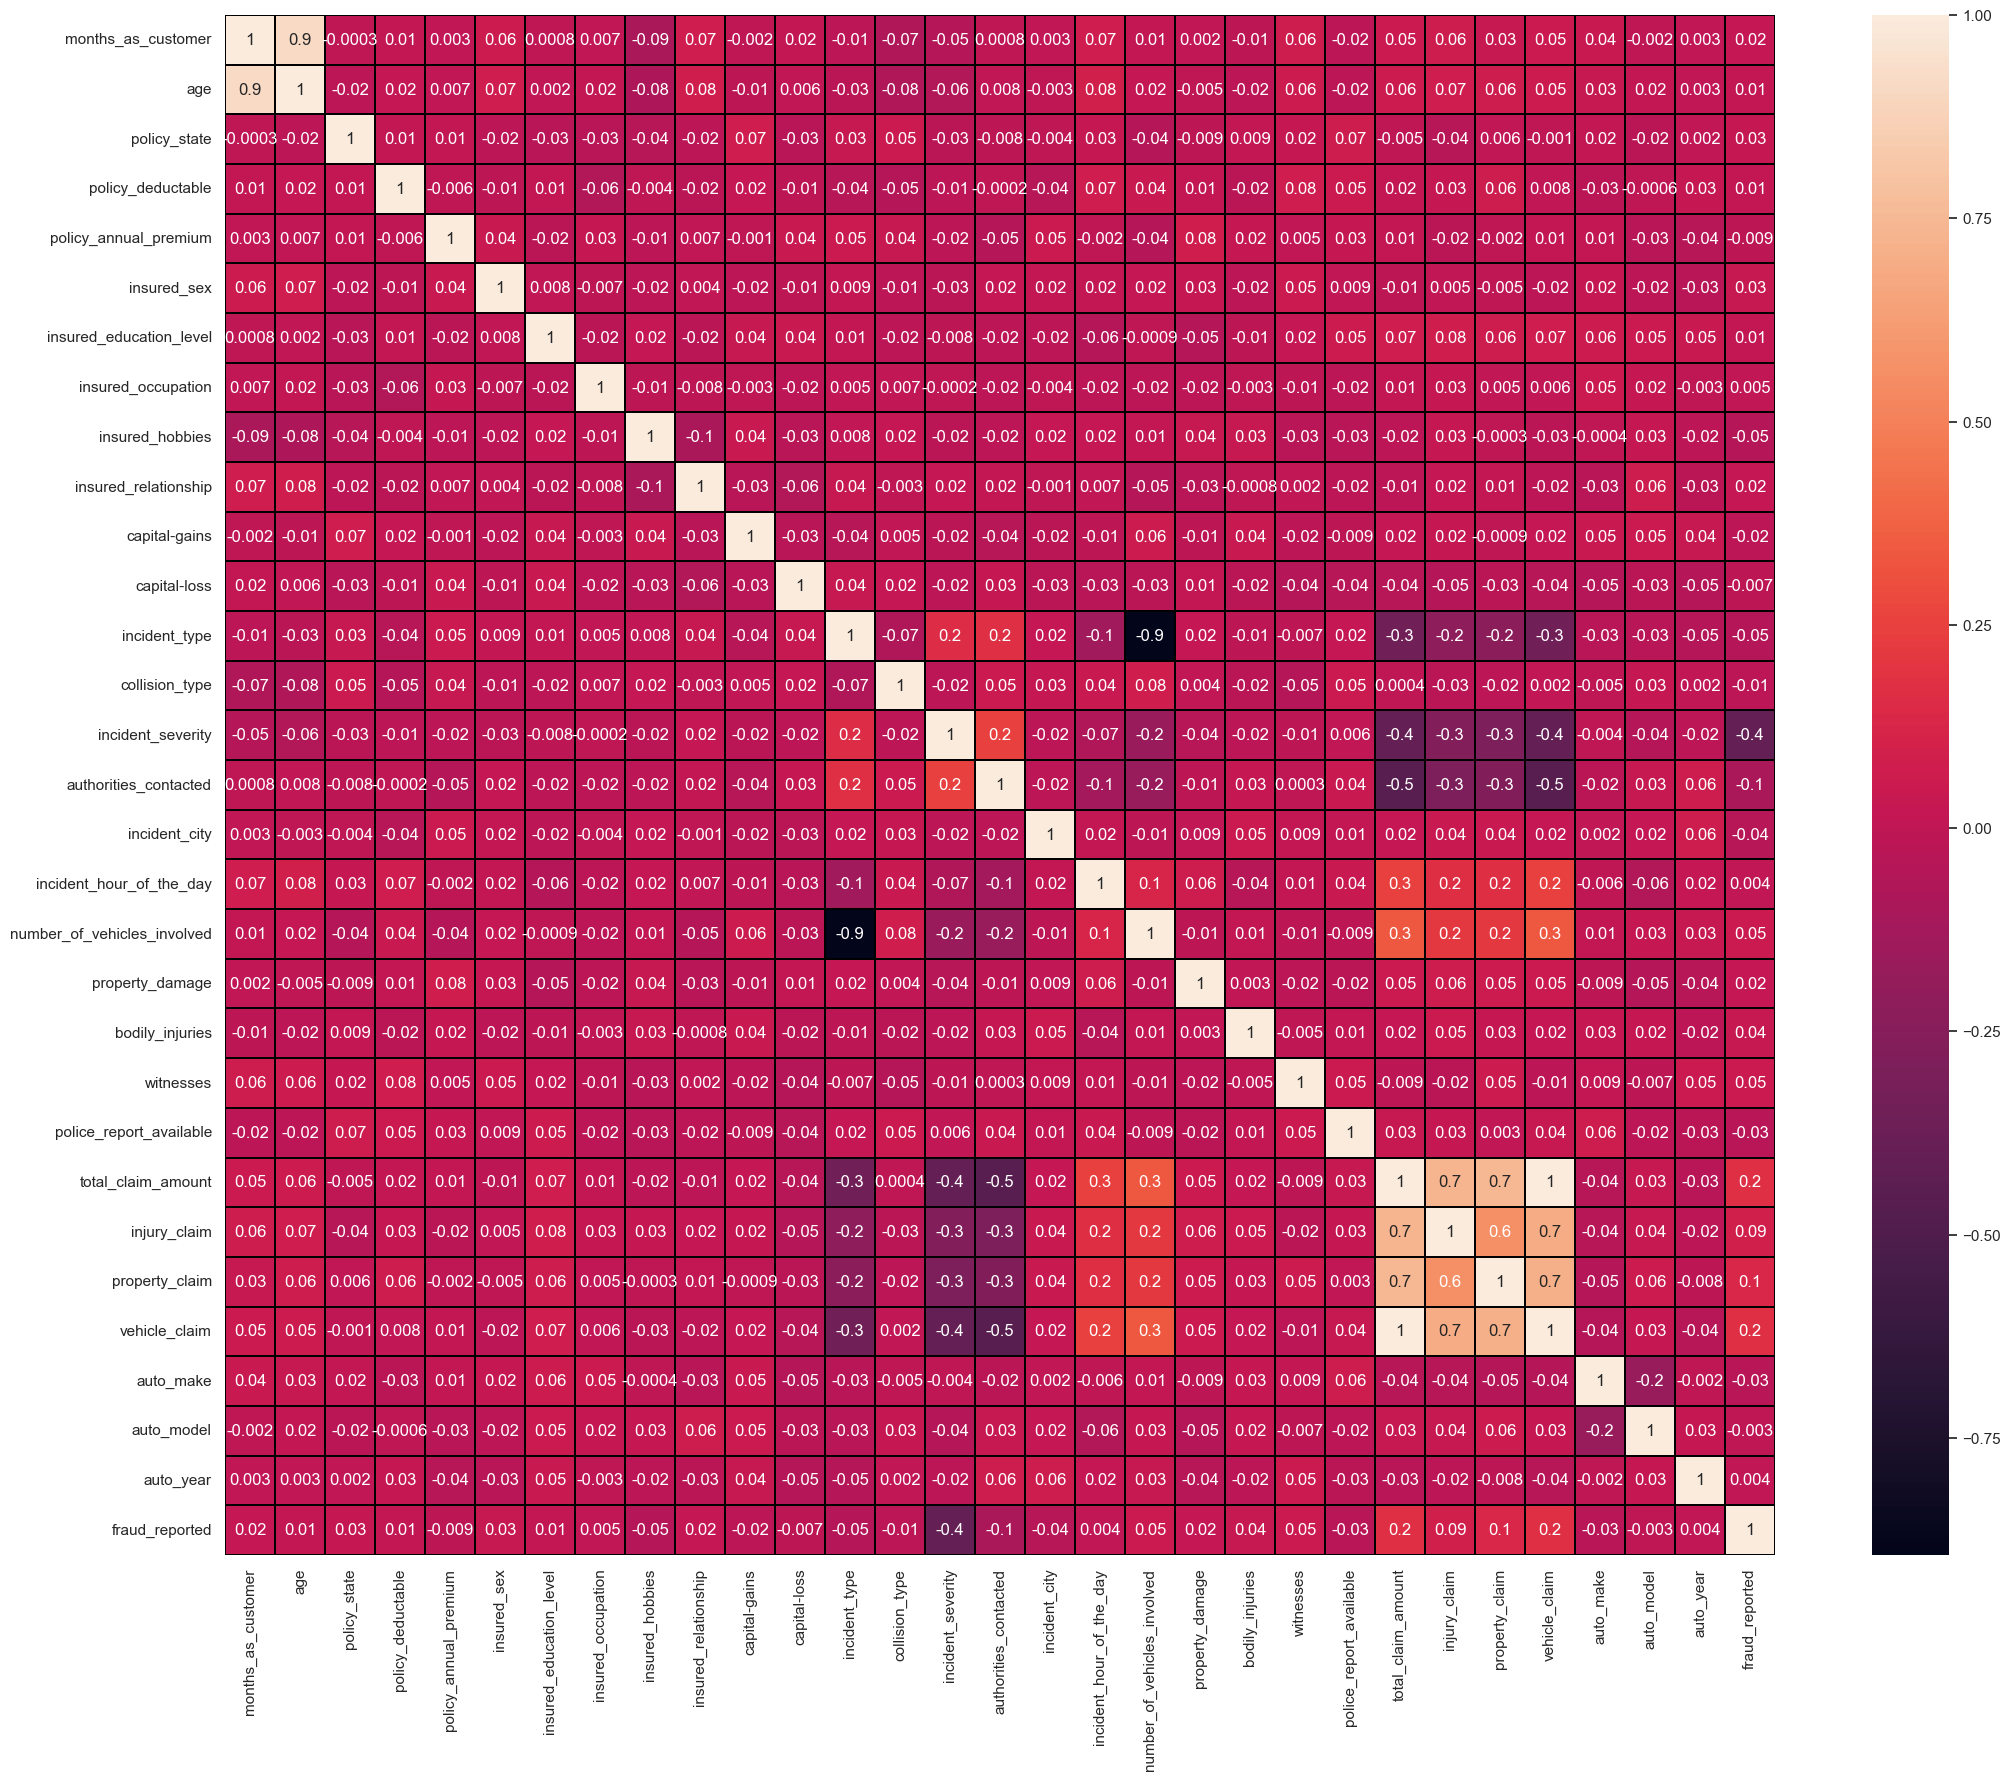

In [99]:
#visualizing the correlation matrix by plotting  heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df_d1.corr(),linewidth=0.1,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0)
plt.show()

vehcle_claim and Total_claim amount are highly correlated to each other lets check there vaiance inflation factor if issue of multicollinearity exists 

# Feature scaling using Standard Scalariztian 

In [103]:
#separating features and label
x=df_d1.drop("fraud_reported",axis=1)
y=df_d1["fraud_reported"]

In [104]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.143964,0.985617,1.184903,0.043753,0.622381,1.073087,0.531182,-1.160391,1.278936,-1.435720,...,0.008597,0.468694,1.478478,0.627696,-0.160533,1.227460,0.640511,0.855252,-1.649064,-0.184646
1,0.272078,0.329346,-0.018155,1.286345,-0.249934,1.073087,0.531182,-0.164124,0.927127,-0.246465,...,-1.212208,-1.333557,-0.676371,-2.074400,-1.288725,-1.330864,-2.110345,0.358541,-0.660801,0.314552
2,-0.619852,-1.092575,1.184903,1.286345,0.648298,-0.931891,1.556415,1.081211,-1.359632,0.348162,...,1.229402,1.369819,-0.676371,-0.193834,0.259878,-1.006260,-0.276994,-0.634880,0.956358,0.314552
3,0.542663,0.219968,-1.221212,1.286345,0.659114,-0.931891,1.556415,-1.409458,-1.359632,0.942789,...,0.008597,0.468694,-0.676371,0.485223,-0.229715,-0.208503,0.609324,-0.883235,1.315727,1.479347
4,0.272078,0.548103,-1.221212,0.043753,1.358705,1.073087,-1.519283,1.081211,-1.359632,0.942789,...,-1.212208,-0.432431,-0.676371,-1.853286,-1.161006,-1.380380,-1.880046,-1.628301,1.046200,0.647351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,-1.822454,-0.108168,1.184903,0.043753,0.222561,-0.931891,1.043798,-1.160391,0.575318,0.942789,...,-1.212208,-0.432431,-0.676371,0.862271,1.771230,0.501226,0.829552,-0.138169,-1.199854,0.148152
990,0.813248,0.219968,-1.221212,0.043753,0.746683,-0.931891,1.556415,0.583077,1.278936,1.537417,...,1.229402,1.369819,-0.676371,1.128394,1.803160,1.755630,1.035200,1.600317,0.776674,1.645747
991,-0.659939,-0.545682,1.184903,-1.198839,0.524953,-0.931891,1.043798,-1.409458,-1.183728,-0.246465,...,1.229402,1.369819,1.478478,0.558299,0.190696,0.231639,0.649996,1.103607,-0.031906,-1.515842
992,1.925655,2.516917,-1.221212,1.286345,0.414422,1.073087,-1.519283,-0.413190,-1.711441,1.537417,...,-1.212208,-0.432431,1.478478,0.142628,-0.639483,-0.643143,0.230353,-1.379946,-1.289696,-1.183043


We have scaled the data using standard scalarization to overcome the issue of biasness

In [106]:
#checking variance Infltation Factor[VIF]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,Vif values,Features
0,6.024718,months_as_customer
1,6.046789,age
2,1.029290,policy_state
3,1.034085,policy_deductable
4,1.027856,policy_annual_premium
5,1.025583,insured_sex
6,1.039767,insured_education_level
7,1.016579,insured_occupation
8,1.042676,insured_hobbies
9,1.035279,insured_relationship


here total_claim_amount is highest in the collineatity less drop it and check


In [107]:
x.drop('total_claim_amount',axis=1, inplace=True)

In [108]:
#checking variance Infltation Factor[VIF]

vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,Vif values,Features
0,6.001569,months_as_customer
1,6.032482,age
2,1.028697,policy_state
3,1.033772,policy_deductable
4,1.027777,policy_annual_premium
5,1.021824,insured_sex
6,1.039758,insured_education_level
7,1.014315,insured_occupation
8,1.042580,insured_hobbies
9,1.034375,insured_relationship


In [109]:
x.drop('age',axis=1, inplace=True)

In [110]:
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,Vif values,Features
0,1.039279,months_as_customer
1,1.027743,policy_state
2,1.033761,policy_deductable
3,1.027391,policy_annual_premium
4,1.019327,insured_sex
5,1.039749,insured_education_level
6,1.013903,insured_occupation
7,1.042394,insured_hobbies
8,1.033747,insured_relationship
9,1.025409,capital-gains


In [112]:
x.drop('incident_type',axis=1, inplace=True)

In [113]:
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,Vif values,Features
0,1.039238,months_as_customer
1,1.027570,policy_state
2,1.033621,policy_deductable
3,1.027048,policy_annual_premium
4,1.015840,insured_sex
5,1.038525,insured_education_level
6,1.013728,insured_occupation
7,1.040833,insured_hobbies
8,1.033543,insured_relationship
9,1.024655,capital-gains


now data don't have mulitcollinearity issue

# Oversampling as there is huge gap and class is imbalance

In [114]:
#oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [115]:
y.value_counts()

fraud_reported
0    748
1    246
Name: count, dtype: int64

In [116]:
y1.value_counts()

fraud_reported
1    748
0    748
Name: count, dtype: int64

The minor class is duplicated and the class is balanced now

Modelling

In [117]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [118]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [119]:
# Initialize and train a Decision Tree model
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Initialize and train a Random Forest model
rm= RandomForestClassifier()
rm.fit(X_train, y_train)

# Initialize the linear Regressionmoder
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

# Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', C=1) 
svm_model.fit(X_train, y_train)
y_pred= svm_model.predict(X_test)

# AdaBoost classifier using Decision Trees as base estimators
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred= adaboost_model.predict(X_test)

# Evaluate the Decision Tree model
y_pred= dt.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test,y_pred)
decision_tree_report = classification_report(y_test, y_pred)

# Evaluate the Random Forest model
y_pred= rm.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred)
random_forest_report = classification_report(y_test, y_pred)

#Evalueate the linear Regresson model
y_pred= dt.predict(X_test)
Linear_Regression_accuracy = accuracy_score(y_test,y_pred)
Linear_Regression_report = classification_report(y_test, y_pred)

# Evaluate SVM
svm_accuracy = accuracy_score(y_test,y_pred)
svm_classification_report = classification_report(y_test,y_pred)

# Evaluate AdaBoost
adaboost_accuracy = accuracy_score(y_test,y_pred)
adaboost_classification_report = classification_report(y_test,y_pred)

print("\nDecision Tree Model:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print("Classification Report:\n", decision_tree_report)

print("\nRandom Forest Model:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print("Classification Report:\n", random_forest_report)

print("\nLineat Regression Model:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print("Classification Report:\n", decision_tree_report)

print("SVM Results:")
print(f"Accuracy: {svm_accuracy:.2f}")
print("Classification Report:\n", svm_classification_report)

print("\nAdaBoost Results:")
print(f"Accuracy: {adaboost_accuracy:.2f}")
print("Classification Report:\n", adaboost_classification_report)


Decision Tree Model:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       138
           1       0.87      0.88      0.87       162

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300


Random Forest Model:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       138
           1       0.84      0.91      0.88       162

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300


Lineat Regression Model:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       138
           1       0.87      0.88      0.87       

here all models have almost the same accuracy of 86% then we can select any one model and do the hyperparamete tuning


In [120]:
from sklearn.model_selection import GridSearchCV

# Creating the parameter grid
param_grid = {'n_estimators': [50, 100, 150],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]}

# Creating the Random Forest Classifier
rm= RandomForestClassifier()

# Create Grid Search
grid_search = GridSearchCV(estimator=rm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Using the best model for predictions
best_rm = grid_search.best_estimator_
y_pred = best_rm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.8733333333333333


here the accuracy increased and its 87% and we can select this model 

Prediction of the values

In [121]:
#  X_train having the data of the triaining dataset 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Using the trained model to make predictions on the test dataset
y_test_pred = model.predict(X_test)

# Now, y_pred contains the predicted values for the test dataset

In [122]:
y_test_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [123]:
p=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=y_test_pred
df['Original']=p
df

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
295,1,1
296,1,1
297,0,0
298,1,0
